In [2]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata

In [12]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("naz8-j4nc", limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,lab_report_date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,deaths_unknown_age,deaths_female,deaths_male,deaths_unknown_gender,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth
0,2020-07-24T00:00:00.000,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-07-23T00:00:00.000,43,0,2,10,15,3,6,2,4,...,0,0,0,0,0,0,0,0,0,0
2,2020-07-22T00:00:00.000,153,1,11,48,35,26,12,13,8,...,0,1,0,0,0,0,0,1,0,0
3,2020-07-21T00:00:00.000,178,0,12,48,36,36,19,12,6,...,0,0,0,0,0,0,0,0,0,0
4,2020-07-20T00:00:00.000,337,3,45,80,70,52,41,33,13,...,0,1,2,0,2,0,1,0,0,0


In [13]:
# Case by race dataframe
death_by_race_df = results_df[["lab_report_date",
                      "deaths_latinx",
                      "deaths_asian_non_latinx",
                      "deaths_black_non_latinx",
                      "deaths_white_non_latinx",
                      "deaths_other_non_latinx",
                     "deaths_unknown_race_eth"]]

# Clean the data by dropping empty row
death_by_race_df = death_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = death_by_race_df.columns.drop("lab_report_date")
death_by_race_df[cols] = death_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
death_by_race_df["lab_report_date"] = pd.to_datetime(death_by_race_df["lab_report_date"]).dt.date

Text(0.5, 0, 'Total # of Cases')

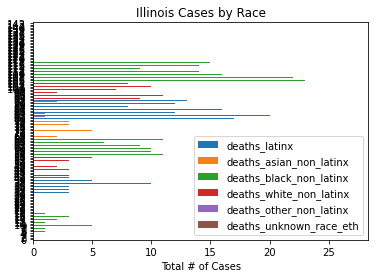

In [14]:
death_by_race_df.plot(kind='barh')
plt.title('Illinois Cases by Race')
plt.xlabel('Total # of Cases')
